## World Happiness 15,16,17

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [7]:
#Happiness Report for years 2015, 2016, and 2017
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
happiness2016 = pd.read_csv("World_Happiness_2016.csv")
happiness2017 = pd.read_csv("World_Happiness_2017.csv")
#Adding Year column
happiness2015["Year"] = 2015
happiness2016["Year"] = 2016
happiness2017["Year"] = 2017

**Concatenating 2015 and 2016 tables**

In [9]:
#First 3 rows, "Country", "Happiness Score", "Year" columns
head_2015 = happiness2015[["Country", "Happiness Score", "Year"]].head(3)
head_2016 = happiness2016[["Country", "Happiness Score", "Year"]].head(3)

In [12]:
#Concatenating on rows
concat_axis0 = pd.concat([head_2015, head_2016], axis=0)
concat_axis0

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016


In [13]:
#Concatenating on columnns
concat_axis1 = pd.concat([head_2015, head_2016], axis=1)
concat_axis1

,Country,Happiness Score,Year,Country,Happiness Score,Year
0,Switzerland,7.587,2015,Denmark,7.526,2016
1,Iceland,7.561,2015,Switzerland,7.509,2016
2,Denmark,7.527,2015,Iceland,7.501,2016


**Concatenating dataframes with different shapes**

In [23]:
# 2015 has 4 rows * 4 columns, and 2016 has 3 rows * 3 columns
head_2015 = happiness2015[["Year", "Country", "Happiness Score", "Standard Error"]].head(4)
# 2016 doesn't have columnn "Standard Error"
head_2016 = happiness2016[["Country", "Happiness Score", "Year"]].head(3)
print("2015 dataframe\n", head_2015, "\n")
print("2016 dataframe\n", head_2016)

2015 dataframe
    Year      Country  Happiness Score  Standard Error
0  2015  Switzerland            7.587         0.03411
1  2015      Iceland            7.561         0.04884
2  2015      Denmark            7.527         0.03328
3  2015       Norway            7.522         0.03880 

2016 dataframe
        Country  Happiness Score  Year
0      Denmark            7.526  2016
1  Switzerland            7.509  2016
2      Iceland            7.501  2016


In [34]:
concat_axis0 = pd.concat([head_2015, head_2016], axis=0)
concat_axis0

,Country,Happiness Score,Standard Error,Year
0,Switzerland,7.587,0.03411,2015
1,Iceland,7.561,0.04884,2015
2,Denmark,7.527,0.03328,2015
3,Norway,7.522,0.03880,2015
0,Denmark,7.526,NaN,2016
1,Switzerland,7.509,NaN,2016
2,Iceland,7.501,NaN,2016


* 2016 dataframe doesn't have Standard Error column, so after concatenating, the values appear as null/NaN

In [35]:
#ignore_index parameter set to True ignores the index
concat_update_index = pd.concat([head_2015, head_2016], axis=0, ignore_index=True)
concat_update_index

,Country,Happiness Score,Standard Error,Year
0,Switzerland,7.587,0.03411,2015
1,Iceland,7.561,0.04884,2015
2,Denmark,7.527,0.03328,2015
3,Norway,7.522,0.03880,2015
4,Denmark,7.526,NaN,2016
5,Switzerland,7.509,NaN,2016
6,Iceland,7.501,NaN,2016


**Using pd.merge()**
* Combines dataframes by column.
* Can only combine two dataframes at a time.
* Combines on a common Key.

In [39]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
print("Year 2015:\n", three_2015)
print("Year 2016:\n",three_2016)

Year 2015:
    Country  Happiness Rank  Year
2  Denmark               3  2015
3   Norway               4  2015
4   Canada               5  2015
Year 2016:
    Country  Happiness Rank  Year
2  Iceland               3  2016
3   Norway               4  2016
4  Finland               5  2016


In [40]:
#Merging 2015 and 2016 on "Contry" columnn
merged = pd.merge(left=three_2015, right=three_2016, on="Country")
merged

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016


* Both dataframes only have one "Country" key in common: Norway

In [48]:
#Merging 2015 and 2016 on "Country"
#How=Left. Left = 2015
merged_left = pd.merge(left=three_2015, right=three_2016, how='left', on='Country')
print("2015 is left\n", merged_left)
#How=Left. Left = 2016
merged_left_updated = pd.merge(left=three_2016, right=three_2015, on='Country', how= "left")
print("\n2016 is left\n", merged_left_updated)

2015 is left
    Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Denmark                 3    2015               NaN     NaN
1   Norway                 4    2015               4.0  2016.0
2   Canada                 5    2015               NaN     NaN

2016 is left
    Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Iceland                 3    2016               NaN     NaN
1   Norway                 4    2016               4.0  2015.0
2  Finland                 5    2016               NaN     NaN


* 2015 has Denmark and Canada, and 2016 adds null values
* 2016 has Iceland, Norway, and Finland. Since 2015 doesn't have Iceland and Norway, it inputs null values.

**Adding parameter suffixes = ("_2015", "_2016")**

In [50]:
merged_suffixes = pd.merge(left=three_2015, right=three_2016, how='left', on='Country', suffixes=("_2015", "_2016"))
merged_updated_suffixes = pd.merge(left=three_2016, right=three_2015, how = 'left', on='Country', suffixes=("_2016", "_2015"))
print("2015 is left\n", merged_suffixes)
print("\n2016 is left\n", merged_updated_suffixes)

2015 is left
    Country  Happiness Rank_2015  Year_2015  Happiness Rank_2016  Year_2016
0  Denmark                    3       2015                  NaN        NaN
1   Norway                    4       2015                  4.0     2016.0
2   Canada                    5       2015                  NaN        NaN

2016 is left
    Country  Happiness Rank_2016  Year_2016  Happiness Rank_2015  Year_2015
0  Iceland                    3       2016                  NaN        NaN
1   Norway                    4       2016                  4.0     2015.0
2  Finland                    5       2016                  NaN        NaN


**Joining on Index**

In [53]:
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
print("2015 dataframe:\n", four_2015)
print("\n2016 dataframe:\n", three_2016)

2015 dataframe:
    Country  Happiness Rank  Year
2  Denmark               3  2015
3   Norway               4  2015
4   Canada               5  2015
5  Finland               6  2015

2016 dataframe:
    Country  Happiness Rank  Year
2  Iceland               3  2016
3   Norway               4  2016
4  Finland               5  2016


In [60]:
merge_index = pd.merge(left = four_2015,right = three_2016, left_index = True, right_index = True, suffixes = ('_2015','_2016'))
print("merge 2015 and 2016 on index INNER:\n", merge_index)
merge_index_left = pd.merge(left = four_2015,right = three_2016, left_index = True, right_index = True, suffixes = ('_2015','_2016'), how="left")
print("\nMerge 2015 and 2016 on index LEFT:\n", merge_index_left)

merge 2015 and 2016 on index INNER:
   Country_2015  Happiness Rank_2015  Year_2015 Country_2016  \
2      Denmark                    3       2015      Iceland   
3       Norway                    4       2015       Norway   
4       Canada                    5       2015      Finland   

   Happiness Rank_2016  Year_2016  
2                    3       2016  
3                    4       2016  
4                    5       2016  

Merge 2015 and 2016 on index LEFT:
   Country_2015  Happiness Rank_2015  Year_2015 Country_2016  \
2      Denmark                    3       2015      Iceland   
3       Norway                    4       2015       Norway   
4       Canada                    5       2015      Finland   
5      Finland                    6       2015          NaN   

   Happiness Rank_2016  Year_2016  
2                  3.0     2016.0  
3                  4.0     2016.0  
4                  5.0     2016.0  
5                  NaN        NaN  


**Conncatenating 3 dataframes**

In [75]:
#Renaming 'Happiness.Score' column to 'Happiness Score'
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)

In [78]:
combined = pd.concat([happiness2015, happiness2016, happiness2017])
print("2015, 2016, and 2016 dataframe:\n")
combined.head(3)

2015, 2016, and 2016 dataframe:



,Country,Dystopia Residual,Dystopia.Residual,Economy (GDP per Capita),Economy..GDP.per.Capita.,Family,Freedom,Generosity,Happiness Rank,Happiness Score,...,Health..Life.Expectancy.,Lower Confidence Interval,Region,Standard Error,Trust (Government Corruption),Trust..Government.Corruption.,Upper Confidence Interval,Whisker.high,Whisker.low,Year
0,Switzerland,2.51738,NaN,1.39651,NaN,1.34951,0.66557,0.29678,1.0,7.587,...,NaN,NaN,Western Europe,0.03411,0.41978,NaN,NaN,NaN,NaN,2015
1,Iceland,2.70201,NaN,1.30232,NaN,1.40223,0.62877,0.43630,2.0,7.561,...,NaN,NaN,Western Europe,0.04884,0.14145,NaN,NaN,NaN,NaN,2015
2,Denmark,2.49204,NaN,1.32548,NaN,1.36058,0.64938,0.34139,3.0,7.527,...,NaN,NaN,Western Europe,0.03328,0.48357,NaN,NaN,NaN,NaN,2015


In [79]:
#Pivot table with mean Happiness score for each yearpivot_table_combined = combined.pivot_table("Happiness Score", "Year")
pivot_table_combined

,Happiness Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


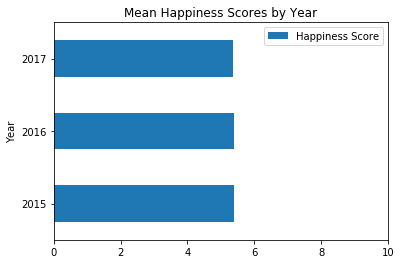

In [81]:
pivot_table_combined.plot(kind="barh", title="Mean Happiness Scores by Year", xlim=(0,10))
